In [ ]:
# Initialize Otter
import otter
grader = otter.Notebook("3-1.ipynb")

# Unsupervised Learning

# PCA

### Question 1a

This is an otter-grader notebook. To complete it, you need write new Python cells, or replace `...` in the existing cells.

This cell loads the iris dataset as a Pandas DataFrame:


In [2]:
from scipy.stats import multivariate_normal
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
import numpy as np


iris_df = sns.load_dataset('iris') 

- Write code which prints out the columns from this DataFrame
- Write code which displays the first 5 rows of the DataFrame. Which column is non-numeric (write its name as a valid Python string)?

In [4]:
columns = iris_df.columns
columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [5]:
first_5_rows = iris_df.head(5)
first_5_rows

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [35]:
iris_df.dtypes[iris_df.dtypes == 'object']

species    object
dtype: object

In [6]:
non_numeric_column = "species"
non_numeric_column

'species'

In [ ]:
grader.check("q1")

### Question 1b

- Using [seaborn](https://seaborn.pydata.org/), produce a pairwise scatterplot of the data.  Without looking at the classes, how many groups do there look to be? 
- Now, produce a scatterplot which shows the data class as the hue. Which variables are useful for separating the classes? Which groups are difficult to distinguish using the variables?

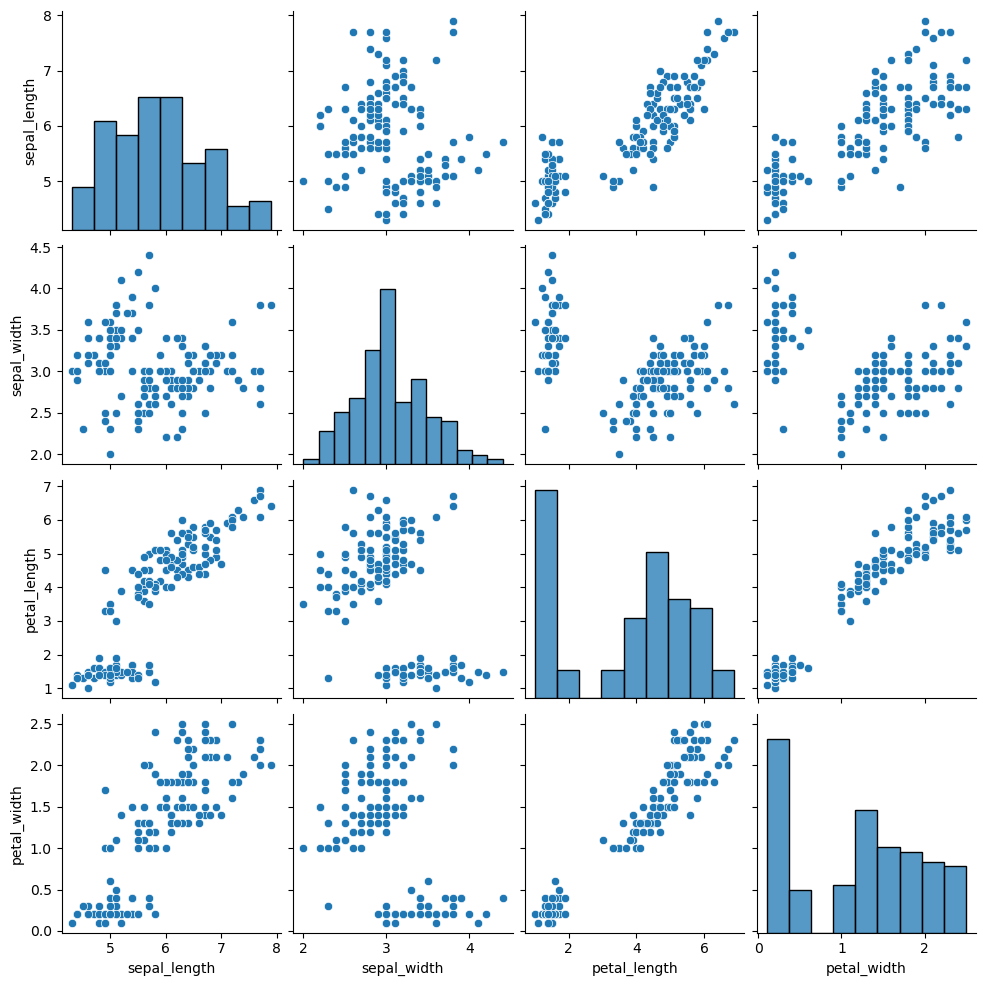

In [8]:
sns.pairplot(
    data= iris_df
) 

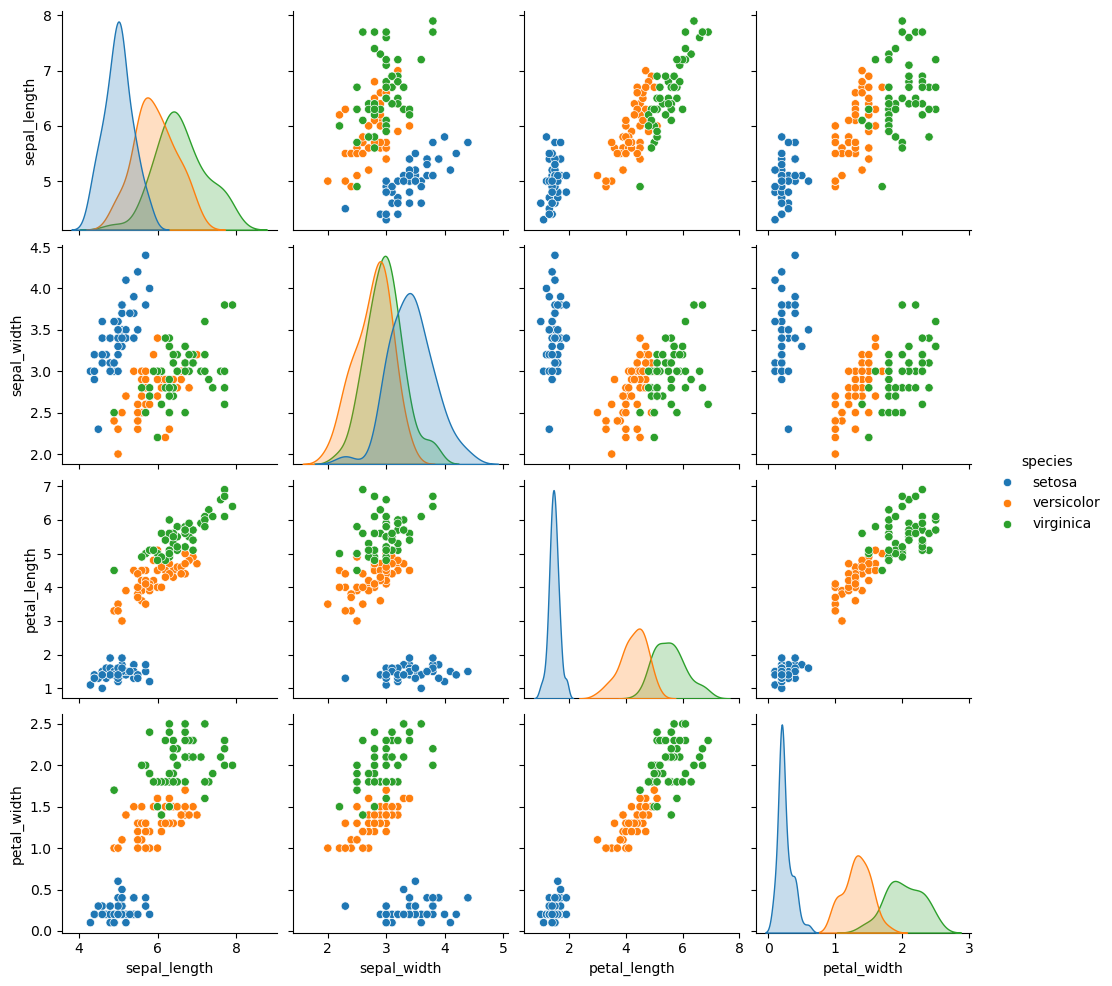

In [10]:
sns.pairplot(
    data= iris_df,
    hue= non_numeric_column
) 

### Question 2a

- Individual columns of Pandas `DataFrames` can be selected by *indexing* using square brackets (`[]`). Select the column for the petal length variable.
- When you select a column, it's returned as a pandas `Series` object. These objects have many useful methods, as described in [the documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html). Calculate the mean and sample standard deviation of the petal length.
- You can also select multiple columns from a DataFrame by including a list of the columns between the square brackets (e.g. `[['column_1', 'column_2']]`). Select all the numeric columns from the iris DataFrame.

In [17]:
column_with_the_length_of_the_petals = iris_df["petal_length"]

In [18]:
petal_length_mean = column_with_the_length_of_the_petals.mean()
petal_length_std= column_with_the_length_of_the_petals.std()

In [19]:
all_numeric_columns = iris_df[["sepal_length","sepal_width","petal_length","petal_width"]]

### Question 2b 

Operations on pandas `Series` and `DataFrames` can be *broadcast*, so that the same arithmetic operation is applied at once to multiple variables. That means if you add (or multiply or divide) a scalar to a DataFrame or Series, it is added to each value individually. 
- Multiply `series_1` by 2, and look at the result. Divide `df_1` by 3, look at the result.

We saw that methods like `.mean` can be applied to a `Series`, and produce one number by combining many numbers. When this kind of operation is applied to a `DataFrame` --- which has multiple dimensions --- there are different ways that the individual values can be combined. We could produce the mean of every cell, one mean for each column, or one mean for each row. Which of these results we get is controlled by the `axis` argument of the method. 
- Using the [documentation for the `mean` method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mean.html), compute mean of all the cells in the DataFrame, the mean for each column, and the mean for each row.

In [20]:
series_1 = pd.Series([1, 2, 3]) 
print(series_1*2)

0    2
1    4
2    6
dtype: int64


In [21]:
df_1 = pd.DataFrame({'column_1': [1, 2, 3], 'column_2': [4, 5, 6]})
print(df_1 / 3)

   column_1  column_2
0  0.333333  1.333333
1  0.666667  1.666667
2  1.000000  2.000000


In [25]:
mean_of_every_cell = df_1.mean(axis=None)
mean_of_every_cell

np.float64(3.5)

In [23]:
mean_of_every_row = df_1.mean(axis=1)
mean_of_every_row

0    2.5
1    3.5
2    4.5
dtype: float64

In [27]:
mean_of_every_column = df_1.mean(axis=0) #which can be ignored too, default is column
mean_of_every_column

column_1    2.0
column_2    5.0
dtype: float64

### Question 2c

To *scale* or standardize variables before doing PCA, we subtract the mean from each value of the variables, and then divide the result by the standard deviation of the variables. 

We're going to do this for every numeric column in the DataFrame.
- First, select the original column with the name `c`
- Then, subtract the mean of that column from the column
- Then, divide the result by the standard deviation of the column.
- Then, check the means of all the columns are indeed zero

In [29]:
iris_df_scaled = iris_df.copy()
for c in ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']:
    original_column = iris_df[c]
    original_column_minus_mean = original_column-original_column.mean()
    scaled_column = original_column_minus_mean / original_column.std()
    iris_df_scaled[c] = scaled_column
iris_df_scaled

,sepal_length,sepal_width,petal_length,petal_width,species
0,-0.897674,1.015602,-1.335752,-1.311052,setosa
1,-1.139200,-0.131539,-1.335752,-1.311052,setosa
2,-1.380727,0.327318,-1.392399,-1.311052,setosa
3,-1.501490,0.097889,-1.279104,-1.311052,setosa
4,-1.018437,1.245030,-1.335752,-1.311052,setosa
...,...,...,...,...,...
145,1.034539,-0.131539,0.816859,1.443994,virginica
146,0.551486,-1.278680,0.703564,0.919223,virginica
147,0.793012,-0.131539,0.816859,1.050416,virginica
148,0.430722,0.786174,0.930154,1.443994,virginica


In [41]:
means_of_all_the_scaled_columns = iris_df_scaled.mean(numeric_only=True).round()
means_of_all_the_scaled_columns

sepal_length   -0.0
sepal_width    -0.0
petal_length   -0.0
petal_width    -0.0
dtype: float64

In [42]:
pca.explained_variance_ratio_

array([0.72962445, 0.22850762, 0.03668922, 0.00517871])

### Question 3

Using the [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) class from scikit-learn
- Fit PCA to the scaled data you just created, by calling the appropriate method using your dataframe as an argument
- Use the `.transform` method to compute the PCA scores

Now, we're going to produce a pairwise scatterplot of the scores. `pca_result`, as returned by `.transform()`, is a `numpy` array, but we'd like to have it as a Pandas `DataFrame` to make it easier to deal with.
- Add a new column to the `pca_scores_df` `DataFrame` which contains the original 'species' column
- Produce a pairwise scatterplot of the pca scores, colored by species. 
- Which components are useful for distinguishing the species?

In [36]:
# Import the PCA class
from sklearn.decomposition import PCA

# Create an instance of the PCA class
pca = PCA()

# Fit the pca instance to the data
X_scaled = iris_df_scaled[['sepal_length','sepal_width','petal_length','petal_width']]
pca.fit(X_scaled)

PCA()

In [39]:
pca_scores = pca.transform(X_scaled)
pca_scores

array([[-2.25714118e+00,  4.78423832e-01,  1.27279624e-01,
        -2.40875085e-02],
       [-2.07401302e+00, -6.71882687e-01,  2.33825517e-01,
        -1.02662845e-01],
       [-2.35633511e+00, -3.40766425e-01, -4.40539002e-02,
        -2.82823051e-02],
       [-2.29170679e+00, -5.95399863e-01, -9.09852971e-02,
         6.57353401e-02],
       [-2.38186270e+00,  6.44675659e-01, -1.56856473e-02,
         3.58028703e-02],
       [-2.06870061e+00,  1.48420530e+00, -2.68782498e-02,
        -6.58611612e-03],
       [-2.43586845e+00,  4.74851181e-02, -3.34350297e-01,
         3.66527670e-02],
       [-2.22539189e+00,  2.22403002e-01,  8.83993519e-02,
         2.45299187e-02],
       [-2.32684533e+00, -1.11160370e+00, -1.44592465e-01,
         2.67695403e-02],
       [-2.17703491e+00, -4.67447569e-01,  2.52918268e-01,
         3.97660677e-02],
       [-2.15907699e+00,  1.04020587e+00,  2.67784001e-01,
        -1.66755027e-02],
       [-2.31836413e+00,  1.32633999e-01, -9.34461909e-02,
      

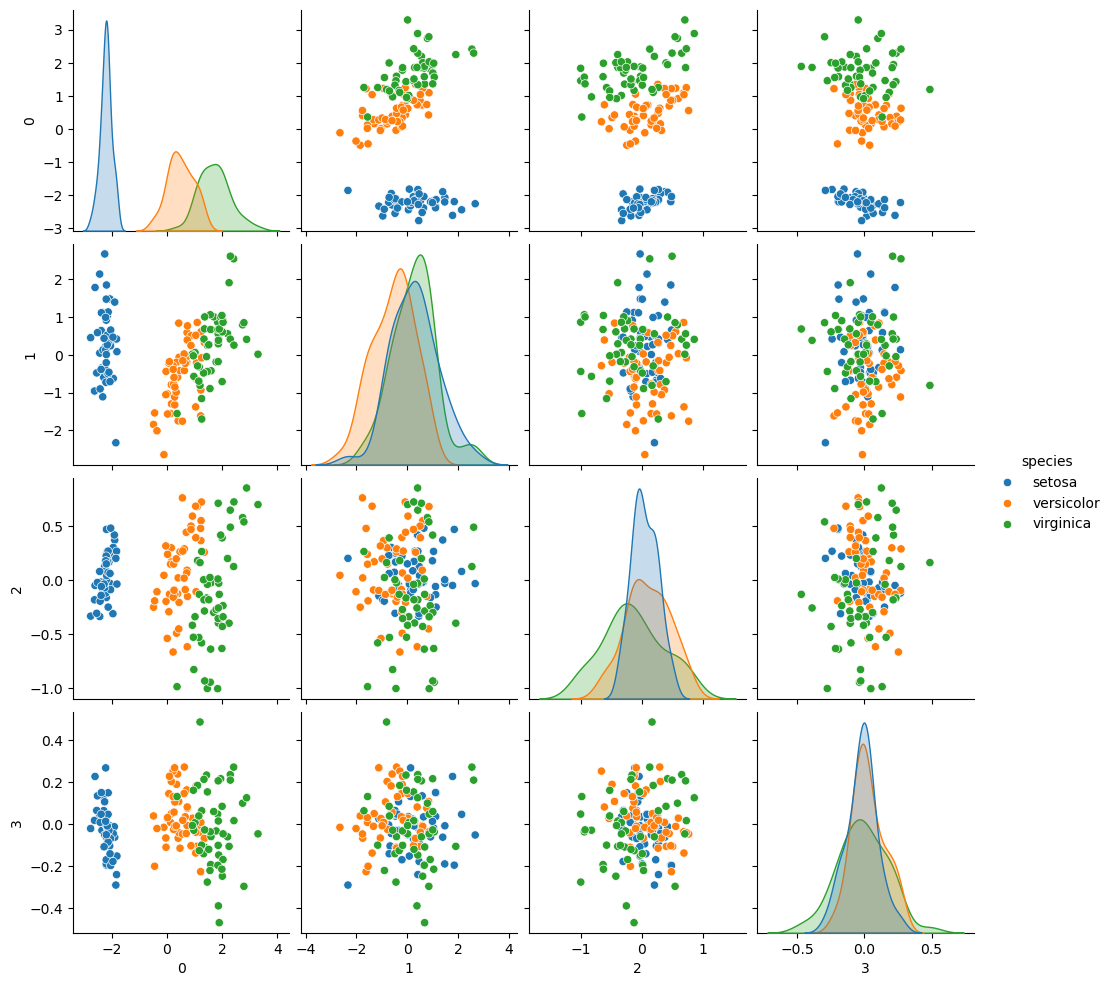

In [40]:
pca_df = pd.DataFrame(pca_scores)

# Add a new column to the DataFrame which includes the original 
pca_df['species']  = iris_df['species']


# Produce a pairplot of the transformed data using species as the hue:
sns.pairplot(pca_df, hue='species')

### Question 4

We're looking at image data for the first time. This dataset, often called "MNIST", is a very commonly-used machine learning dataset which contains images of hand-written digits.


In [ ]:
from sklearn.datasets import load_digits

digits = load_digits()

digits.images

This dataset can be represented in different formats. `.images` contains a numpy array, where the first dimension is the image, the second is the x-coordinate of the pixel, and the third is the y-coordinate of the pixel. Each of the values is a measure of grayscale color intensity with 0 being black and 16 being white.

Numpy arrays can be indexed like pandas DataFrames, but they usually don't have column names, so they're indexed with numbers rather than strings. 
- What is the shape of the `digits.images` array?
- How many dimensions does it have?

Recall that you can select elements from a multi-dimensional array, like a pandas DataFrame, using square brackets with the value for each dimension specified as a number and an empty slice (`:`) used to mean "keep all values for this dimension".

Matplotlib can render 2-d arrays as images using `.imshow`.
- Show the first image (index 0)

In [ ]:
shape_of_the_array = ...

In [ ]:
num_dimensions = ...

In [ ]:
array_1 = np.array([[0, 1], [2, 3]])
array_1

In [ ]:
# This gets the first row

array_1[0,:]

# This gets the first column

array_1[:, 0]

In [ ]:
first_image = ...
fig, ax = plt.subplots()
ax.imshow(first_image)

### Question 5

For machine learning purposes, at the moment we're going to ignore the spatial information and just represent each pixel as an separate column in our DataFrame.


In [ ]:
# Create our DataFrame: each row is a observation of a digit, each column is a pixel, each cell is the grayscale colour of that pixel
digits_df = pd.DataFrame(digits['data'], columns = digits['feature_names'] )
digits_df['label'] = digits['target']
digits_df

The `umap` dimensionality reduction method can be used in the same way as PCA, but it's in the `umap-learn` package (importable using `import umap`)

In [ ]:
import umap

reducer = umap.UMAP(n_components=2, random_state=211)

- Produce an embedding for the digits data using `umap`. 
- Display a scatterplot for the embedding, coloured by the original digit class
- What part of the space corresponds to the digit '0'?

In [ ]:
# Fit the umap reducer
...

# Transform the digits data
embedding_array = ...

# Turn the numpy array into a DataFrame
embedding_df = pd.DataFrame(embedding_array)

# Add the digit class_label to the embedding dataframe
embedding_df['label'] = ...

In [ ]:
sns.scatterplot(
    x= ...
    y= ...
    hue = embedding_df['label']
)


In [ ]:
# First, get the rows in the embedding_df where the label is zero
rows_with_label_zero = ...

# Find the minimum of column 0, which is shown on the x-axis
min_x = ...

# And the same for the max, 
max_x = ...

#  And the same for column 1
min_y = ...
max_y = ...

In [ ]:
# This will draw first the same scatterplot as before,
# then a rectangle with the coordinates we just found

import matplotlib.patches as patches

fig, ax = plt.subplots(figsize=(8,8))

sns.scatterplot(
    ...
)

ax.add_patch(
     patches.Rectangle(
         (min_x, min_y),
         max_x-min_x,
         max_y-min_y,
         edgecolor='red',
         fill=False,
     ) )


# Clustering

### Question 6

Normally, in unsupervised learning, we don't know how many clusters there are. When we're using the iris data, we're sort of cheating because we do know. But that means that we can use the class label to check how well the clustering works.

- Determine the number of distinct species in the data
- Fit the k-means cluster to the iris_df data
- Show the number of observations with each correct label being assigned each label by k-means 
- Using `.map`, change the k-means labels to the species name they're most likely to be
- Count how many observations would be mis-classified

In [ ]:
from sklearn.cluster import KMeans
import seaborn as sns

iris_df = sns.load_dataset('iris') 
iris_df

In [ ]:
distinct_species_in_the_data = ...
number_of_species_in_the_data = ...
number_of_species_in_the_data

In [ ]:
kmeans = KMeans(
    n_clusters=number_of_species_in_the_data,
    random_state=211
    ).fit(
        ...
) 

In [ ]:
#  Get the cluster labels and assign them as a column in the DataFrame
cluster_from_kmeans= kmeans.labels_
iris_df['label_kmeans'] = cluster_from_kmeans

#  Show the number of observations for each value of the true label and the one k-means found
iris_df.groupby(
    ...
).size()

In [ ]:
#  Create a new column based on label_kmeans,
#  whose value is the most common species for each label k-means produced
iris_df['label_kmeans_name'] = iris_df['label_kmeans'].map({
    ...
    ...
    ...
})


In [ ]:
#  How many are mis-classified?

number_misclassified = ...

# Agglomerative clustering

### Question 7

We're going to fit agglomerative clustering on the iris dataset. The functions below make it possible to plot the dendrogram.
- At what height would you have to cut the dendrogram to make three clusters?

In [ ]:
#  https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html
from scipy.cluster.hierarchy import dendrogram, cut_tree

def compute_linkage_matrix(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)
    return linkage_matrix



def plot_dendrogram(model, **kwargs):
    linkage_matrix = compute_linkage_matrix(model, **kwargs)
    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

In [ ]:
from sklearn.cluster import AgglomerativeClustering

iris_df = sns.load_dataset('iris') 
clustering = AgglomerativeClustering(n_clusters=None, distance_threshold=0).fit(iris_df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])

plot_dendrogram(clustering, truncate_mode="level")

In [ ]:
height_to_get_three_clusters  = ...
linkage_matrix = compute_linkage_matrix(clustering)
agglomerative_clusters = cut_tree(linkage_matrix, 
                    height=height_to_get_three_clusters
                    ).T
# The clusters are returned with  shape (1, 150). To use them as a column later, 
# we need them to be shape (150), so remove one dimension with .reshape:
agglomerative_clusters = agglomerative_clusters.reshape(-1)
# Print out all the cluster assignments to check there are only three
agglomerative_clusters

# Additional Questions

### Question

What proportion of variance is explained by each of the principal components? Produce a scree plot and a plot which shows the cumulative proportion of variance explained.

### Question

Using the `.components_` attribute of the fitted PCA object and the scaled dataframe, manually compute the PCA scores. Compare these to the previous result

### Question

From looking at the scatterplot for the UMAP clustering of the digits, some digits look like they're close to digits from the wrong class

Display the image of the '5' digit which is most easily confused with another digit. What is its position in the embedding space? What digit is it confused with?

### Question

Write a function which takes n_neighbors as an argument and plots the UMAP plot. Which number of n_neighbors seems best?

Write a function which takes n_neighbors and produces a number which measures the usefuleness of the UMAP plot (how you define this is up to you). Which number of n_neighbors seems best?

### Question

What are the centroids of each of the  k-mean iris_df clusters? Which points are most distant from each of the clusters? If you constructed clusters based on the centroids of the true classes, how good would the clustering be? How close to this does k-means get?

### Question

Try to use k-means to cluster the noisy_circles_df dataset. Why doesn't k-means work well in this case? What happens if you apply UMAP before k-means?

In [ ]:
from sklearn import datasets
import numpy as np
import pandas as pd

# From https://scikit-learn.org/stable/auto_examples/cluster/plot_linkage_comparison.html#sphx-glr-auto-examples-cluster-plot-linkage-comparison-py
n_samples = 1500
noisy_circles = datasets.make_circles(
    n_samples=n_samples, factor=0.5, noise=0.05, random_state=170
)
noisy_circles_df = pd.DataFrame(noisy_circles[0]).assign(group=noisy_circles[1])

### Question

Using the `umap` package, transform the scaled iris dataset, and visualize the result. Which species are easiest to distinguish?

## Open questions

These questions don't have a pre-written solution, but if you want to find one yourself, do share it with us!

### Question

Using your code to find the centroids from above, implement k-means clustering.

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

In [ ]:
# Save your notebook first, then run this cell to export your submission.
grader.export(pdf=False)